# 4 Part 1: Data Preprocessing

In [2]:
# Q1

import pandas as pd

train = pd.read_csv('./data/train.csv', sep=',')
test = pd.read_csv('./data/test.csv', sep=',')

In [3]:
display(train.describe(include='all'))
display(test.describe(include='all'))

age     sex          bmi     children smoker     region  \
count   1000.000000    1000  1000.000000  1000.000000   1000       1000   
unique          NaN       2          NaN          NaN      2          4   
top             NaN  female          NaN          NaN     no  southeast   
freq            NaN     500          NaN          NaN    787        267   
mean      39.321000     NaN    30.623855     1.101000    NaN        NaN   
std       14.109111     NaN     6.136897     1.204263    NaN        NaN   
min       18.000000     NaN    15.960000     0.000000    NaN        NaN   
25%       26.000000     NaN    26.195000     0.000000    NaN        NaN   
50%       40.000000     NaN    30.495000     1.000000    NaN        NaN   
75%       51.250000     NaN    34.585000     2.000000    NaN        NaN   
max       64.000000     NaN    53.130000     5.000000    NaN        NaN   

              charge        label  
count    1000.000000  1000.000000  
unique           NaN          NaN  
top              NaN          NaN  
freq             NaN          NaN  
mean    13421.682556     0.316000  
std     12089.266683     0.465146  
min      1121.873900     0.000000  
25%      4819.842913     0.000000  
50%      9623.125350     0.000000  
75%     16781.331022     1.000000  
max     63770.428010     1.000000

age   sex         bmi    children smoker     region  \
count   338.000000   338  338.000000  338.000000    338        338   
unique         NaN     2         NaN         NaN      2          4   
top            NaN  male         NaN         NaN     no  southeast   
freq           NaN   176         NaN         NaN    277         97   
mean     38.869822   NaN   30.780385    1.076923    NaN        NaN   
std      13.888735   NaN    5.989647    1.210733    NaN        NaN   
min      18.000000   NaN   16.815000    0.000000    NaN        NaN   
25%      28.000000   NaN   26.433750    0.000000    NaN        NaN   
50%      38.000000   NaN   30.127500    1.000000    NaN        NaN   
75%      50.750000   NaN   35.100000    2.000000    NaN        NaN   
max      64.000000   NaN   48.070000    5.000000    NaN        NaN   

              charge       label  
count     338.000000  338.000000  
unique           NaN         NaN  
top              NaN         NaN  
freq             NaN         NaN  
mean    12822.906613    0.307692  
std     12178.132854    0.462223  
min      1131.506600    0.000000  
25%      4533.166450    0.000000  
50%      8544.817725    0.000000  
75%     15446.216200    1.000000  
max     62592.873090    1.000000

In [4]:
display(train.head())
display(test.head())

age     sex     bmi  children smoker     region       charge  label
0   27    male  28.500         0    yes  northwest  18310.74200      1
1   18  female  37.290         1     no  southeast   2219.44510      0
2   43  female  20.045         2    yes  northeast  19798.05455      1
3   35  female  38.095         2     no  northeast  24915.04626      1
4   59    male  25.460         1     no  northeast  12913.99240      0

age     sex     bmi  children smoker     region       charge  label
0   59  female  26.505         0     no  northeast  12815.44495      0
1   35  female  31.000         1     no  southwest   5240.76500      0
2   57  female  23.180         0     no  northwest  11830.60720      0
3   52  female  37.525         2     no  northwest  33471.97189      1
4   44  female  36.955         1     no  northwest   8023.13545      0

In [5]:
display(train.duplicated().sum())
display(test.duplicated().sum())

1

0

In [6]:
train = train.drop_duplicates()
test = test.drop_duplicates()
display(train.duplicated().sum())
display(test.duplicated().sum())

0

0

In [7]:
display(train.isna().sum())
display(test.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charge      0
label       0
dtype: int64

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charge      0
label       0
dtype: int64

In [8]:
display(train['sex'].value_counts())
train['sex'] = (train['sex']=='male') * 1
display(train['sex'].value_counts())

display(test['sex'].value_counts())
test['sex'] = (test['sex']=='male') * 1
display(test['sex'].value_counts())

female    500
male      499
Name: sex, dtype: int64

0    500
1    499
Name: sex, dtype: int64

male      176
female    162
Name: sex, dtype: int64

1    176
0    162
Name: sex, dtype: int64

In [9]:
display(train['smoker'].value_counts())
train['smoker'] = (train['smoker']=='yes') * 1
display(train['smoker'].value_counts())

display(test['smoker'].value_counts())
test['smoker'] = (test['smoker']=='yes') * 1
display(test['smoker'].value_counts())

no     786
yes    213
Name: smoker, dtype: int64

0    786
1    213
Name: smoker, dtype: int64

no     277
yes     61
Name: smoker, dtype: int64

0    277
1     61
Name: smoker, dtype: int64

In [10]:
display(train['region'].value_counts())
display(test['region'].value_counts())

train_region = pd.get_dummies(train['region'])
test_region = pd.get_dummies(test['region'])

train = pd.concat([train, train_region], axis=1)
test = pd.concat([test, test_region], axis=1)

train.drop(['region'], axis=1, inplace=True)
test.drop(['region'], axis=1, inplace=True)

display(train.apply(pd.Series.value_counts).loc[0:1,:])
display(test.apply(pd.Series.value_counts).loc[0:1,:])
display(train.head())
display(test.head())

southeast    267
northwest    250
northeast    243
southwest    239
Name: region, dtype: int64

southeast    97
southwest    86
northeast    81
northwest    74
Name: region, dtype: int64

age    sex  bmi  children  smoker  charge  label  northeast  northwest  \
0.0  NaN  500.0  NaN     429.0   786.0     NaN  683.0      756.0      749.0   
1.0  NaN  499.0  NaN     235.0   213.0     NaN  316.0      243.0      250.0   

     southeast  southwest  
0.0      732.0      760.0  
1.0      267.0      239.0

age    sex  bmi  children  smoker  charge  label  northeast  northwest  \
0.0  NaN  162.0  NaN     144.0   277.0     NaN  234.0      257.0      264.0   
1.0  NaN  176.0  NaN      89.0    61.0     NaN  104.0       81.0       74.0   

     southeast  southwest  
0.0      241.0      252.0  
1.0       97.0       86.0

age  sex     bmi  children  smoker       charge  label  northeast  \
0   27    1  28.500         0       1  18310.74200      1          0   
1   18    0  37.290         1       0   2219.44510      0          0   
2   43    0  20.045         2       1  19798.05455      1          1   
3   35    0  38.095         2       0  24915.04626      1          1   
4   59    1  25.460         1       0  12913.99240      0          1   

   northwest  southeast  southwest  
0          1          0          0  
1          0          1          0  
2          0          0          0  
3          0          0          0  
4          0          0          0

age  sex     bmi  children  smoker       charge  label  northeast  \
0   59    0  26.505         0       0  12815.44495      0          1   
1   35    0  31.000         1       0   5240.76500      0          0   
2   57    0  23.180         0       0  11830.60720      0          0   
3   52    0  37.525         2       0  33471.97189      1          0   
4   44    0  36.955         1       0   8023.13545      0          0   

   northwest  southeast  southwest  
0          0          0          0  
1          0          0          1  
2          1          0          0  
3          1          0          0  
4          1          0          0

<AxesSubplot:>

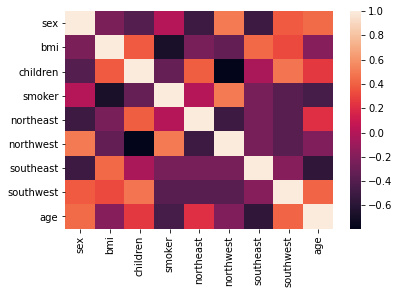

In [11]:
import seaborn as sns

train_corr = train.iloc[[0,1,2,3,4,7,8,9,10],[1,2,3,4,7,8,9,10,0]].corr()
sns.heatmap(train_corr)

# 5 Part 2: Regression

In [12]:
# Q2 - Q3

from sklearn.model_selection import train_test_split

X = train[train.columns[[0,1,2,3,4,7,8,9,10]]].copy()
y = train[train.columns[[5,6]]].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)

display(X_train.head())
display(y_train.head())
display(X_val.head())
display(y_val.head())

age  sex     bmi  children  smoker  northeast  northwest  southeast  \
814   35    1  17.860         1       0          0          1          0   
739   27    0  34.800         1       0          0          0          0   
809   22    0  28.050         0       0          0          0          1   
136   26    1  31.065         0       0          0          1          0   
322   49    1  36.850         0       0          0          0          1   

     southwest  
814          0  
739          1  
809          0  
136          0  
322          0

charge  label
814  5116.50040      0
739  3577.99900      0
809  2155.68150      0
136  2699.56835      0
322  8125.78450      0

age  sex    bmi  children  smoker  northeast  northwest  southeast  \
469   42    1  35.80         2       0          0          0          0   
386   44    0  38.06         0       1          0          0          1   
517   35    1  27.10         1       0          0          0          0   
41    23    0  42.75         1       1          1          0          0   
968   47    0  26.60         2       0          1          0          0   

     southwest  
469          1  
386          0  
517          1  
41           0  
968          0

charge  label
469   7160.09400      0
386  48885.13561      1
517   4746.34400      0
41   40904.19950      1
968   9715.84100      0

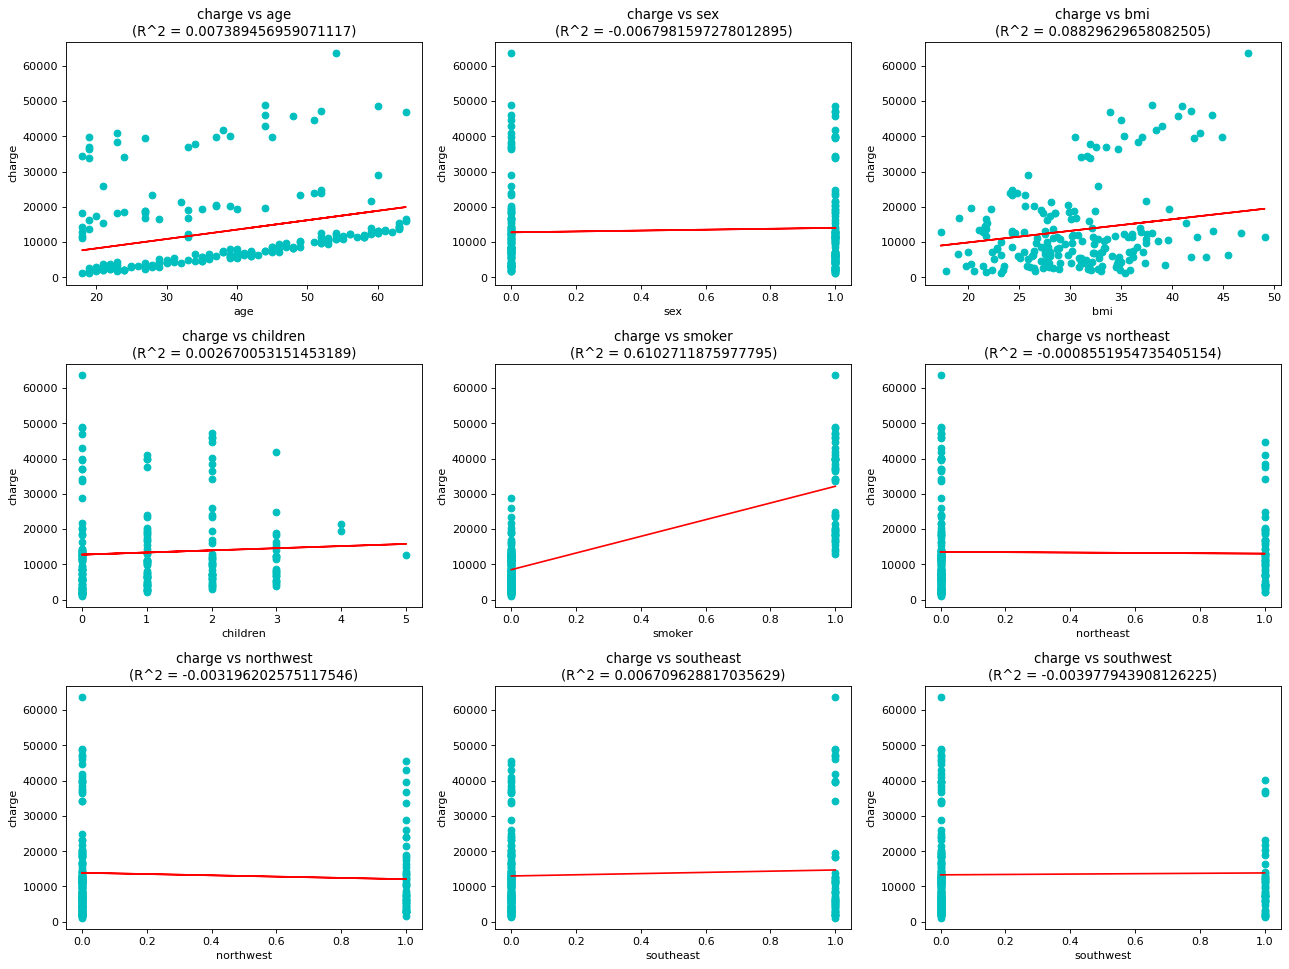

0.7632440007914385

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

fig, axs = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(16, 12), dpi=80)

y_train_charge = y_train['charge'].values.reshape(-1,1)
y_val_charge = y_val['charge'].values.reshape(-1,1)

for (col, ax) in zip(X_train.columns, axs.flat):
    model = LinearRegression()
    X_train_col = X_train[col].values.reshape(-1,1)
    X_val_col = X_val[col].values.reshape(-1,1)
    
    model.fit(X_train_col, y_train_charge)
    y_pred = model.predict(X_val_col)
    r2 = r2_score(y_val_charge, y_pred)
    
    ax.scatter(X_val_col, y_val_charge,  color='c')
    ax.plot(X_val_col, y_pred, color='red')
    ax.set_xlabel(col)
    ax.set_ylabel('charge')
    ax.set_title(f'charge vs {col}\n(R^2 = {r2})')
    
plt.show()

lin_model = LinearRegression()
lin_model.fit(X_train, y_train_charge)
y_pred = lin_model.predict(X_val)
r2 = r2_score(y_val_charge, y_pred)

display(r2)

# 6 Part 3: Classification

## 6.1 Feature Selection

In [14]:
# Q4

from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

y_label = y['label']

q4 = pd.DataFrame(columns=X.columns)
q4 = q4.append(pd.DataFrame([f_classif(X, y_label)[0]],
                            columns=X.columns,
                            index=['f_classif']))
q4 = q4.append(pd.DataFrame([chi2(X, y_label)[0]],
                            columns=X.columns,
                            index=['chi2']))
q4 = q4.append(pd.DataFrame([mutual_info_classif(X, y_label, random_state=4211)],
                            columns=X.columns,
                            index=['mutual_info_classif']))
display(q4)

display(X.columns)
selector = SelectKBest(f_classif, k=len(X.columns)-2).fit(X, y['label'])
X = X.iloc[:, selector.get_support(indices=True)]
display(X.columns)

age       sex       bmi  children       smoker  \
f_classif            16.206831  0.184330  1.349763  1.954379  1363.904410   
chi2                 80.688568  0.092425  1.661031  2.569718   454.075507   
mutual_info_classif   0.052957  0.000609  0.000000  0.008538     0.320690   

                     northeast  northwest  southeast  southwest  
f_classif             0.114417   0.233475   1.724736   1.468004  
chi2                  0.086750   0.175358   1.264119   1.117395  
mutual_info_classif   0.000000   0.000000   0.010120   0.005580

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

Index(['age', 'bmi', 'children', 'smoker', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

## 6.2 Logistic Regression

In [15]:
# Q5

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211)

display(X_train.describe(include='all'))
display(X_val.describe(include='all'))

X_train_prev_mean = X_train.mean()
X_train_prev_std = X_train.std()
X_train = (X_train - X_train_prev_mean) / X_train_prev_std
X_val = (X_val - X_train_prev_mean) / X_train_prev_std

display(X_train.describe(include='all'))
display(X_val.describe(include='all'))

age         bmi    children      smoker   northwest   southeast  \
count  799.000000  799.000000  799.000000  799.000000  799.000000  799.000000   
mean    39.470588   30.632635    1.115144    0.209011    0.250313    0.266583   
std     14.175195    6.083295    1.223930    0.406857    0.433465    0.442450   
min     18.000000   15.960000    0.000000    0.000000    0.000000    0.000000   
25%     26.000000   26.180000    0.000000    0.000000    0.000000    0.000000   
50%     40.000000   30.500000    1.000000    0.000000    0.000000    0.000000   
75%     51.500000   34.430000    2.000000    0.000000    0.500000    1.000000   
max     64.000000   53.130000    5.000000    1.000000    1.000000    1.000000   

        southwest  
count  799.000000  
mean     0.245307  
std      0.430538  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

age         bmi    children      smoker   northwest   southeast  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    38.825000   30.588950    1.050000    0.230000    0.250000    0.270000   
std     13.826069    6.376925    1.124197    0.421889    0.434099    0.445074   
min     18.000000   17.290000    0.000000    0.000000    0.000000    0.000000   
25%     27.000000   26.291250    0.000000    0.000000    0.000000    0.000000   
50%     39.000000   30.257500    1.000000    0.000000    0.000000    0.000000   
75%     51.250000   34.770000    2.000000    0.000000    0.250000    1.000000   
max     64.000000   49.060000    5.000000    1.000000    1.000000    1.000000   

        southwest  
count  200.000000  
mean     0.215000  
std      0.411853  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

age           bmi      children        smoker     northwest  \
count  7.990000e+02  7.990000e+02  7.990000e+02  7.990000e+02  7.990000e+02   
mean   8.667104e-17  5.335184e-15  5.356583e-17  7.892449e-17  7.948030e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.514659e+00 -2.411955e+00 -9.111178e-01 -5.137215e-01 -5.774703e-01   
25%   -9.502930e-01 -7.319446e-01 -9.111178e-01 -5.137215e-01 -5.774703e-01   
50%    3.734776e-02 -2.180308e-02 -9.407726e-02 -5.137215e-01 -5.774703e-01   
75%    8.486241e-01  6.242284e-01  7.229633e-01 -5.137215e-01  5.760266e-01   
max    1.730446e+00  3.698221e+00  3.174085e+00  1.944144e+00  1.729524e+00   

          southeast     southwest  
count  7.990000e+02  7.990000e+02  
mean  -9.782190e-17 -1.931427e-16  
std    1.000000e+00  1.000000e+00  
min   -6.025166e-01 -5.697672e-01  
25%   -6.025166e-01 -5.697672e-01  
50%   -6.025166e-01 -5.697672e-01  
75%    1.657628e+00 -5.697672e-01  
max    1.657628e+00  1.752906e+00

age         bmi    children      smoker   northwest   southeast  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    -0.045544   -0.007181   -0.053225    0.051587   -0.000722    0.007722   
std      0.975371    1.048268    0.918515    1.036945    1.001464    1.005931   
min     -1.514659   -2.193324   -0.911118   -0.513722   -0.577470   -0.602517   
25%     -0.879747   -0.713657   -0.911118   -0.513722   -0.577470   -0.602517   
50%     -0.033198   -0.061666   -0.094077   -0.513722   -0.577470   -0.602517   
75%      0.830988    0.680119    0.722963   -0.513722   -0.000722    1.657628   
max      1.730446    3.029175    3.174085    1.944144    1.729524    1.657628   

        southwest  
count  200.000000  
mean    -0.070392  
std      0.956601  
min     -0.569767  
25%     -0.569767  
50%     -0.569767  
75%     -0.569767  
max      1.752906

In [16]:
import time
import random
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

y_train_label = y_train['label']
y_val_label = y_val['label']

log_accuracy_eta0 = 0
log_accuracy = 0
log_f1_eta0 = 0
log_f1 = 0

for eta0 in [0.001, 0.005, 0.01, 0.05, 0.1]:
    np.random.seed(4211) 
    random.seed(4211)
    
    q5_columns = ['training time', 'accuracy', 'F1 score']
    q5 = pd.DataFrame(columns=q5_columns)

    for i in range(3):
        clf_sgd = SGDClassifier(loss='log', eta0=eta0, learning_rate='constant', verbose=0)
        
        tic = time.time()
        clf_sgd.fit(X_train, y_train_label)
        toc = time.time()
        
        training_time = toc-tic
        y_hat = clf_sgd.predict(X_val)
        accuracy = accuracy_score(y_val_label, y_hat)
        F1_score = f1_score(y_val_label, y_hat)
        
        q5 = q5.append(pd.DataFrame([[training_time, accuracy, F1_score]],
                                    columns=q5_columns,
                                    index=[i]))
        display(clf_sgd.get_params())
        
    q5 = q5.append(pd.DataFrame([q5.mean()],
                                columns=q5_columns,
                                index=['mean']))
    q5 = q5.append(pd.DataFrame([q5.std()],
                                columns=q5_columns,
                                index=['std']))
    
    display(q5)
    
    if q5.at['mean','accuracy'] > log_accuracy:
        log_accuracy = q5.at['mean','accuracy']
        log_accuracy_eta0 = eta0
    if q5.at['mean','accuracy'] > log_f1:
        log_f1 = q5.at['mean','accuracy']
        log_f1_eta0 = eta0
        
display(log_accuracy_eta0, log_f1_eta0)

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

training time      accuracy  F1 score
0          0.015996  9.050000e-01  0.825688
1          0.007000  9.050000e-01  0.825688
2          0.006999  9.050000e-01  0.825688
mean       0.009998  9.050000e-01  0.825688
std        0.004241  1.110223e-16  0.000000

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.005,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.005,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.005,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

training time      accuracy  F1 score
0          0.004000  9.050000e-01  0.825688
1          0.004997  9.050000e-01  0.825688
2          0.003999  9.050000e-01  0.825688
mean       0.004332  9.050000e-01  0.825688
std        0.000470  1.110223e-16  0.000000

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

training time  accuracy  F1 score
0          0.003000  0.905000  0.825688
1          0.003998  0.905000  0.825688
2          0.004000  0.910000  0.836364
mean       0.003666  0.906667  0.829247
std        0.000471  0.002357  0.005033

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.05,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.05,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.05,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

training time  accuracy  F1 score
0          0.003000  0.915000  0.849558
1          0.005000  0.905000  0.825688
2          0.002999  0.915000  0.849558
mean       0.003667  0.911667  0.841601
std        0.000943  0.004714  0.011252

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.1,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.1,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.1,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'log',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

training time  accuracy  F1 score
0          0.007000  0.915000  0.852174
1          0.002999  0.910000  0.842105
2          0.002999  0.905000  0.825688
mean       0.004333  0.910000  0.839989
std        0.001886  0.004082  0.010916

0.05

0.05

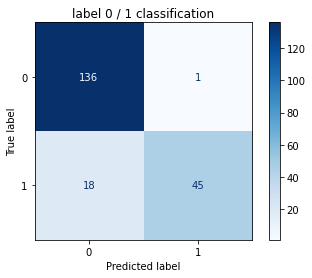

In [17]:
# Q6

disp = plot_confusion_matrix(clf_sgd, X_val, y_val_label,
                             display_labels=[0, 1],
                             cmap=plt.cm.Blues,
                             values_format='.5g')
disp.ax_.set_title('label 0 / 1 classification')
plt.show()

## 6.3 Single-hidden-layer Neural Networks

'hidden_layer_sizes = 1'

training time  accuracy  F1 score
0          0.038996  0.805000  0.589474
1          0.028001  0.315000  0.479087
2          0.028997  0.315000  0.479087
mean       0.031998  0.478333  0.515883
std        0.004965  0.230988  0.052037

'hidden_layer_sizes = 2'

training time  accuracy  F1 score
0          0.044004  0.315000  0.479087
1          0.089005  0.810000  0.577778
2          0.028005  0.315000  0.479087
mean       0.053671  0.480000  0.511984
std        0.025824  0.233345  0.046523

'hidden_layer_sizes = 8'

training time  accuracy  F1 score
0          0.229000  0.880000  0.769231
1          0.119004  0.805000  0.597938
2          0.104999  0.840000  0.666667
mean       0.151001  0.841667  0.677945
std        0.055449  0.030641  0.070383

'hidden_layer_sizes = 16'

training time  accuracy  F1 score
0          0.118003  0.870000  0.779661
1          0.081998  0.885000  0.776699
2          0.142994  0.900000  0.814815
mean       0.114332  0.885000  0.790392
std        0.025036  0.012247  0.017312

'hidden_layer_sizes = 64'

training time  accuracy  F1 score
0          0.116997  0.895000  0.803738
1          0.099006  0.890000  0.792453
2          0.075001  0.870000  0.740000
mean       0.097001  0.885000  0.778730
std        0.017203  0.010801  0.027771

'hidden_layer_sizes = 128'

training time  accuracy  F1 score
0          0.103996  0.895000  0.803738
1          0.092001  0.910000  0.833333
2          0.091000  0.890000  0.792453
mean       0.095666  0.898333  0.809841
std        0.005904  0.008498  0.017238

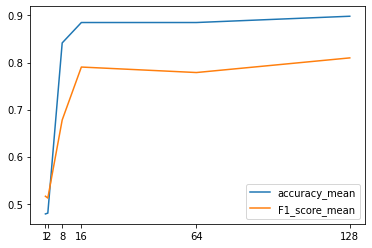

128

128

In [18]:
# Q7 - Q8

from sklearn.neural_network import MLPClassifier

params = []

H = [1, 2, 8, 16, 64, 128]

accuracy_mean = []
F1_score_mean = []

mlp_max_accuracy = 0
mlp_max_accuracy_h = 0
mlp_max_f1 = 0
mlp_max_f1_h = 0

for h in H:
    np.random.seed(4211) 
    random.seed(4211)
    
    q6_columns = ['training time', 'accuracy', 'F1 score']
    q6 = pd.DataFrame(columns=q5_columns)
    
    for i in range(3):
        mlp = MLPClassifier(hidden_layer_sizes=h, max_iter=500, early_stopping=True)
        
        tic = time.time()
        mlp.fit(X_train, y_train_label)
        toc = time.time()
        
        training_time = toc-tic
        y_hat = mlp.predict(X_val)
        accuracy = accuracy_score(y_val_label, y_hat)
        F1_score = f1_score(y_val_label, y_hat)
        
        q6 = q6.append(pd.DataFrame([[training_time, accuracy, F1_score]],
                                    columns=q6_columns,
                                    index=[i]))
    q6 = q6.append(pd.DataFrame([q6.mean()],
                                columns=q6_columns,
                                index=['mean']))
    q6 = q6.append(pd.DataFrame([q6.std()],
                                columns=q6_columns,
                                index=['std']))
    display(f'hidden_layer_sizes = {h}')
    display(q6)
    
    accuracy_mean.append(q6.at['mean','accuracy'])
    F1_score_mean.append(q6.at['mean','F1 score'])
    
    if q6.at['mean','accuracy'] > mlp_max_accuracy:
        mlp_max_accuracy = q6.at['mean','accuracy']
        mlp_max_accuracy_h = h
    
    if q6.at['mean','F1 score'] > mlp_max_f1:
        mlp_max_f1 = q6.at['mean','F1 score']
        mlp_max_f1_h = h
    
plt.xticks(H)
plt.plot(H, accuracy_mean, label='accuracy_mean')
plt.plot(H, F1_score_mean, label='F1_score_mean')
plt.legend()
plt.show()

display(mlp_max_accuracy_h, mlp_max_f1_h)

# 7 Part 4: Performance Enhancement

## 7.1 Hyperparameter Tuning

In [19]:
X_train = train[train.columns[[0,1,2,3,4,7,8,9,10]]].copy()
y_train = train[train.columns[[5,6]]].copy()
X_test = test[test.columns[[0,1,2,3,4,7,8,9,10]]].copy()
y_test = test[test.columns[[5,6]]].copy()

y_train_label = y_train['label']
y_test_label = y_test['label']

display(X_train.describe(include='all'))
display(X_test.describe(include='all'))

X_train = X_train.iloc[:, selector.get_support(indices=True)]
X_test = X_test.iloc[:, selector.get_support(indices=True)]

X_train_prev_mean = X_train.mean()
X_train_prev_std = X_train.std()
X_train = (X_train - X_train_prev_mean) / X_train_prev_std
X_test = (X_test - X_train_prev_mean) / X_train_prev_std

display(X_train.describe(include='all'))
display(X_test.describe(include='all'))

display(y_train.head())
display(y_test.head())

age         sex         bmi    children      smoker   northeast  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean    39.341341    0.499499   30.623889    1.102102    0.213213    0.243243   
std     14.101500    0.500250    6.139971    1.204361    0.409782    0.429256   
min     18.000000    0.000000   15.960000    0.000000    0.000000    0.000000   
25%     26.000000    0.000000   26.190000    0.000000    0.000000    0.000000   
50%     40.000000    0.000000   30.495000    1.000000    0.000000    0.000000   
75%     51.500000    1.000000   34.590000    2.000000    0.000000    0.000000   
max     64.000000    1.000000   53.130000    5.000000    1.000000    1.000000   

        northwest   southeast   southwest  
count  999.000000  999.000000  999.000000  
mean     0.250250    0.267267    0.239239  
std      0.433374    0.442755    0.426833  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.500000    1.000000    0.000000  
max      1.000000    1.000000    1.000000

age         sex         bmi    children      smoker   northeast  \
count  338.000000  338.000000  338.000000  338.000000  338.000000  338.000000   
mean    38.869822    0.520710   30.780385    1.076923    0.180473    0.239645   
std     13.888735    0.500312    5.989647    1.210733    0.385151    0.427500   
min     18.000000    0.000000   16.815000    0.000000    0.000000    0.000000   
25%     28.000000    0.000000   26.433750    0.000000    0.000000    0.000000   
50%     38.000000    1.000000   30.127500    1.000000    0.000000    0.000000   
75%     50.750000    1.000000   35.100000    2.000000    0.000000    0.000000   
max     64.000000    1.000000   48.070000    5.000000    1.000000    1.000000   

        northwest   southeast   southwest  
count  338.000000  338.000000  338.000000  
mean     0.218935    0.286982    0.254438  
std      0.414137    0.453024    0.436190  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

age           bmi      children        smoker     northwest  \
count  9.990000e+02  9.990000e+02  9.990000e+02  9.990000e+02  9.990000e+02   
mean  -3.000603e-18  4.646489e-15  1.097998e-16 -1.609212e-16 -4.934325e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.513409e+00 -2.388267e+00 -9.150925e-01 -5.203087e-01 -5.774463e-01   
25%   -9.460938e-01 -7.221352e-01 -9.150925e-01 -5.203087e-01 -5.774463e-01   
50%    4.670841e-02 -2.099178e-02 -8.477696e-02 -5.203087e-01 -5.774463e-01   
75%    8.622245e-01  6.459495e-01  7.455385e-01 -5.203087e-01  5.762914e-01   
max    1.748655e+00  3.665508e+00  3.236485e+00  1.920012e+00  1.730029e+00   

          southeast     southwest  
count  9.990000e+02  9.990000e+02  
mean   2.867243e-17  4.258633e-16  
std    1.000000e+00  1.000000e+00  
min   -6.036464e-01 -5.604988e-01  
25%   -6.036464e-01 -5.604988e-01  
50%   -6.036464e-01 -5.604988e-01  
75%    1.654941e+00 -5.604988e-01  
max    1.654941e+00  1.782339e+00

age         bmi    children      smoker   northwest   southeast  \
count  338.000000  338.000000  338.000000  338.000000  338.000000  338.000000   
mean    -0.033437    0.025488   -0.020907   -0.079896   -0.072259    0.044528   
std      0.984912    0.975517    1.005291    0.939893    0.955612    1.023194   
min     -1.513409   -2.249015   -0.915092   -0.520309   -0.577446   -0.603646   
25%     -0.804265   -0.682436   -0.915092   -0.520309   -0.577446   -0.603646   
50%     -0.095120   -0.080845   -0.084777   -0.520309   -0.577446   -0.603646   
75%      0.809039    0.729012    0.745539   -0.520309   -0.577446    1.654941   
max      1.748655    2.841400    3.236485    1.920012    1.730029    1.654941   

        southwest  
count  338.000000  
mean     0.035608  
std      1.021924  
min     -0.560499  
25%     -0.560499  
50%     -0.560499  
75%      1.782339  
max      1.782339

charge  label
0  18310.74200      1
1   2219.44510      0
2  19798.05455      1
3  24915.04626      1
4  12913.99240      0

charge  label
0  12815.44495      0
1   5240.76500      0
2  11830.60720      0
3  33471.97189      1
4   8023.13545      0

In [20]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [21]:
# Q11

from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV

grid_dist = {
    'hidden_layer_sizes': [(64,), (128,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd'],
    'learning_rate': ['constant', 'invscaling']
}

mlp = MLPClassifier(early_stopping=True, random_state=4211)

grid_search = GridSearchCV(mlp, grid_dist, cv=5, verbose=0)

grid_search.fit(X_train, y_train_label)

report(grid_search.cv_results_, 10)

Model with rank: 1
Mean validation score: 0.887 (std: 0.016)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (256,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.885 (std: 0.019)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (256,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 3
Mean validation score: 0.885 (std: 0.011)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 4
Mean validation score: 0.883 (std: 0.020)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 5
Mean validation score: 0.871 (std: 0.007)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 6
Mean validation score: 0.850 (std: 0.025)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (256,), 'learning_

In [22]:
# Q12

report(grid_search.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.887 (std: 0.016)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (256,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.885 (std: 0.019)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (256,), 'learning_rate': 'constant', 'solver': 'sgd'}

Model with rank: 3
Mean validation score: 0.885 (std: 0.011)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'solver': 'sgd'}



In [23]:
# Q13

grid_search.score(X_test, y_test_label)

0.8698224852071006

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       234
           1       1.00      0.58      0.73       104

    accuracy                           0.87       338
   macro avg       0.92      0.79      0.82       338
weighted avg       0.89      0.87      0.86       338



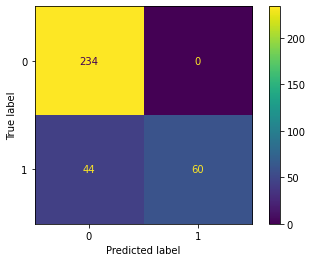

In [24]:
# classification report
from sklearn.metrics import classification_report

pred = grid_search.predict(X_test)

print(classification_report(y_test_label, pred))

# confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid_search, X_test, y_test_label)

## 7.2 Comparison of Classification Methods

In [26]:
# Q15

q15_columns = ['accuracy', 'F1 score']
q15 = pd.DataFrame(columns=q15_columns)

for lr in ['constant', 'optimal', 'invscaling']:
    clf_sgd = SGDClassifier(loss='log', eta0=log_accuracy_eta0, learning_rate=lr, random_state=4211)
    
    clf_sgd.fit(X_train, y_train_label)
    
    y_hat = clf_sgd.predict(X_test)
    accuracy = accuracy_score(y_test_label, y_hat)
    F1_score = f1_score(y_test_label, y_hat)
    
    
    q15 = q15.append(pd.DataFrame([[accuracy, F1_score]],
                                  columns=q15_columns,
                                  index=[lr]))
    
display(q15)

accuracy  F1 score
constant    0.872781  0.739394
optimal     0.896450  0.808743
invscaling  0.872781  0.739394

In [27]:
# Q16

q16_columns = ['accuracy', 'F1 score']
q16 = pd.DataFrame(columns=q16_columns)

for activ in ['logistic', 'tanh', 'relu']:
    mlp = MLPClassifier(hidden_layer_sizes=64, activation=activ, max_iter=500, early_stopping=True, random_state=4211)
    
    mlp.fit(X_train, y_train_label)
    
    y_hat = mlp.predict(X_val)
    accuracy = accuracy_score(y_val_label, y_hat)
    F1_score = f1_score(y_val_label, y_hat)
    
    
    q16 = q16.append(pd.DataFrame([[accuracy, F1_score]],
                                  columns=q16_columns,
                                  index=[activ]))
    
display(q16)

accuracy  F1 score
logistic      0.70  0.189189
tanh          0.91  0.836364
relu          0.90  0.814815